## Small Image Classification Using Convolutional Neural Network (CNN)

#### In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

<img src="images/small_images.jpg" style="width:850px;height:600px;">

In [1]:

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

### Load the dataset

In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 464s 3us/step    


(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

##### Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:50]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3],
       [4],
       [7],
       [7],
       [2],
       [9],
       [9],
       [9],
       [3],
       [2],
       [6],
       [4],
       [3],
       [6],
       [6],
       [2],
       [6],
       [3],
       [5],
       [4],
       [0],
       [0],
       [9],
       [1],
       [3],
       [4],
       [0],
       [3],
       [7],
       [3],
       [3],
       [5],
       [2],
       [2],
       [7],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0]], dtype=uint8)

##### y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### Let's plot some images to see what they are

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

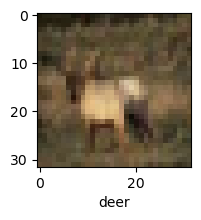

In [11]:
plot_sample(X_train, y_train, 3)

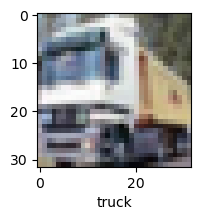

In [12]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

### Normalizing the training data

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [16]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])


ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.3566 - loss: 1.8096
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4276 - loss: 1.6231
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.4543 - loss: 1.5419
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4764 - loss: 1.4809
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4936 - loss: 1.4329


### You can see that at the end of 5 epochs, accuracy is at around 48.48%

In [17]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.39      0.48      1000
           1       0.36      0.85      0.50      1000
           2       0.51      0.13      0.20      1000
           3       0.37      0.17      0.23      1000
           4       0.40      0.47      0.43      1000
           5       0.32      0.46      0.38      1000
           6       0.66      0.27      0.38      1000
           7       0.54      0.53      0.54      1000
           8       0.47      0.72      0.57      1000
           9       0.51      0.40      0.45      1000

    accuracy                           0.44     10000
   macro avg       0.48      0.44      0.42     10000
weighted avg       0.48      0.44      0.42     10000



### Now let us build a convolutional neural network to train our images

In [18]:
ann.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3000)                │       9,219,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000)                │       3,001,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,230,012 (46.65 MB)

 Trainable params: 12,230,010 (46.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [21]:
from tensorflow.keras import models, layers

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])




C:\Users\AARYAMAN\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.4663 - loss: 1.4764
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6091 - loss: 1.1195
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6554 - loss: 0.9849
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6828 - loss: 0.9104
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7028 - loss: 0.8504
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7232 - loss: 0.7956
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.7394 - loss: 0.7480
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 23ms/step - accuracy: 0.7544 - loss: 0.7047
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.7673 - loss: 0.6704
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7775 - loss: 0.6349
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.7880 - loss: 0.6029
Epoch 12

### With CNN, at the end 5 epochs, accuracy was at around 70.28% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [24]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6927 - loss: 1.1941


[1.1940765380859375, 0.6927000284194946]

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([[1.19775345e-04, 1.26429868e-05, 3.08143739e-02, 6.85862005e-01,
        3.28744669e-03, 2.62923632e-02, 1.79356918e-01, 7.86128584e-09,
        7.42502734e-02, 4.28857493e-06],
       [7.79086690e-07, 1.49354804e-02, 9.54370263e-13, 4.04646837e-11,
        1.05922131e-14, 6.03470783e-15, 1.65457730e-12, 3.51293969e-18,
        9.85060036e-01, 3.65200253e-06],
       [1.84852079e-01, 4.30750847e-02, 1.43282683e-04, 1.67263870e-03,
        2.42029710e-05, 1.01872993e-05, 1.43594002e-06, 1.14703074e-03,
        6.12021983e-01, 1.57051980e-01],
       [9.99567926e-01, 1.57862269e-05, 5.60106528e-05, 2.03810896e-06,
        1.54765075e-07, 7.86363472e-08, 1.19567758e-05, 1.41131125e-08,
        3.44869302e-04, 1.28976637e-06],
       [9.64066715e-10, 1.25094990e-09, 5.66661032e-03, 3.71638499e-02,
        2.87057996e-01, 1.70624684e-04, 6.69940829e-01, 5.61636471e-09,
        3.81546919e-08, 4.31092870e-11]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(6)]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

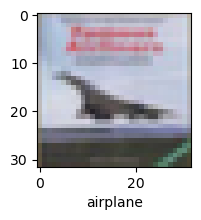

In [28]:
plot_sample(X_test, y_test,3)

In [29]:
classes[y_classes[3]]

'airplane'

In [30]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss     : {test_loss:.4f}")
print(f"Test Accuracy : {test_accuracy:.4f}")

Test Loss     : 1.1941
Test Accuracy : 0.6927


In [31]:
import numpy as np

y_pred = cnn.predict(X_test)

# Convert predictions to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert y_test if one-hot encoded
if len(y_test.shape) > 1:
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


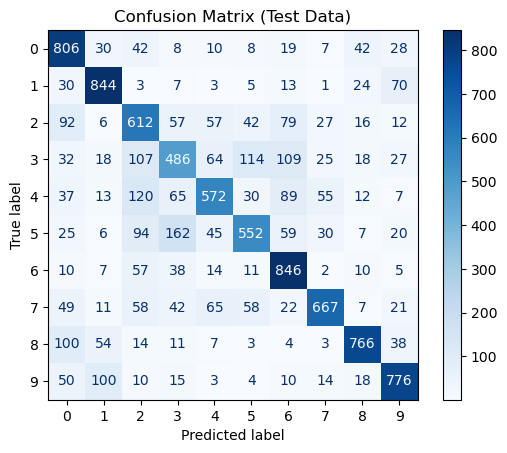

In [32]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')

plt.title("Confusion Matrix (Test Data)")
plt.show()


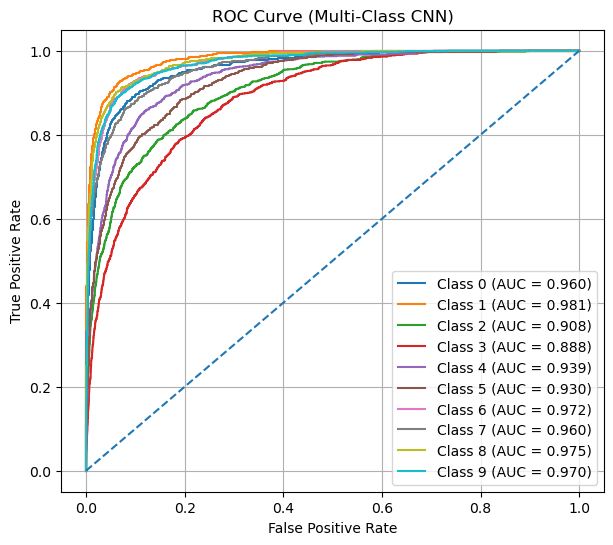

In [33]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

n_classes = y_pred.shape[1]

y_test_bin = label_binarize(
    y_test_classes,
    classes=range(n_classes)
)
plt.figure(figsize=(7, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class CNN)")
plt.legend()
plt.grid(True)
plt.show()



In [34]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 502,688 (1.92 MB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 335,126 (1.28 MB)

# CNN MODEL

<img src="images/CNN.jpg" style="width:1200px;height:300px;">

### The formula for calculating a dimension of the output of conv layer is
## ((n+2p-f)/s)+1

In [ ]:
!pip install keras-tuner


In [35]:
# Hyper parmeters tunning 

In [6]:
import keras_tuner as kt
from tensorflow.keras import layers, models
import tensorflow as tf

# Define a model building function for Keras Tuner
def build_model(hp):
    cnn = models.Sequential()
    
    cnn.add(layers.Conv2D(
        filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32), 
        kernel_size=(hp.Choice('conv_1_kernel_height', values=[3, 5]), 
                     hp.Choice('conv_1_kernel_width', values=[3, 5])), 
        activation='relu', 
        input_shape=(32, 32, 3))
    )
    cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    cnn.add(layers.Conv2D(
        filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64), 
        kernel_size=(hp.Choice('conv_2_kernel_height', values=[3, 5]), 
                     hp.Choice('conv_2_kernel_width', values=[3, 5])), 
        activation='relu')
    )
    cnn.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    cnn.add(layers.Flatten())
    
    cnn.add(layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=64), 
        activation='relu')
    )
    
    cnn.add(layers.Dense(10, activation='softmax'))
    
    cnn.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return cnn

# Hyperparameter tuning using Keras Tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=5,   # reduced for faster execution
    factor=3,
    directory='kt_dir',
    project_name='cnn_tuning',
    overwrite=True
)

tuner.oracle.max_trials = 9

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[stop_early])

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

test_loss, test_acc = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")
print(f"Best Hyperparameters: {best_hyperparameters.values}")

Trial 9 Complete [00h 17m 44s]
val_accuracy: 0.6692000031471252

Best val_accuracy So Far: 0.7078999876976013
Total elapsed time: 02h 11m 13s
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.7079 - loss: 0.8528
Test Accuracy: 0.7078999876976013
Best Hyperparameters: {'conv_1_filters': 128, 'conv_1_kernel_height': 3, 'conv_1_kernel_width': 5, 'conv_2_filters': 192, 'conv_2_kernel_height': 5, 'conv_2_kernel_width': 5, 'dense_units': 256, 'learning_rate': 0.000605898157502881, 'tuner/epochs': 5, 'tuner/initial_epoch': 2, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '1'}
